In [37]:
import pandas as pd # Importing 3 data sets and using names to add headers

data = pd.read_csv('movies.dat', sep='::', names=['MovieID','Title','Genres'], engine='python', encoding="ISO-8859-1")
data1 = pd.read_csv('ratings.dat', sep='::', names=['UserID','MovieID','Rating','Timestamp'], engine='python', encoding="ISO-8859-1")
data2 = pd.read_csv('users.dat', sep='::', names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python', encoding="ISO-8859-1")

In [38]:
master_data = pd.merge(data, data1, on='MovieID', how='left') # Merging movies.dat with rating.dat under MovieID as PK

In [40]:
master_data = pd.merge(master_data, data2, on='UserID', how='left') # Merging master_data with users.dat under UserID as PK

In [44]:
master_data = master_data.drop(['Zip-code','Timestamp'], axis=1) # Dropping unwanted columns

<AxesSubplot:>

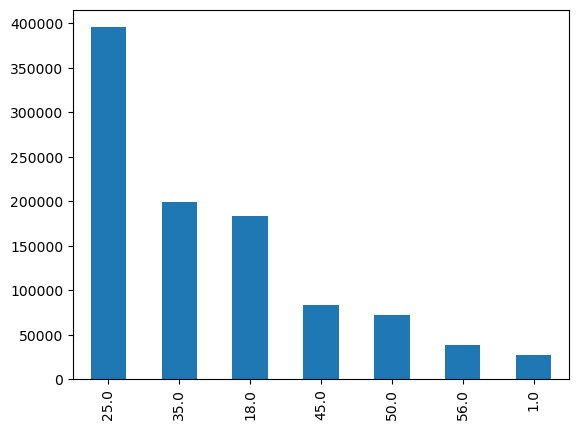

In [47]:
age_distribution = master_data['Age'].value_counts()
age_distribution.plot.bar() # Plotting User Age Distribution 

<AxesSubplot:>

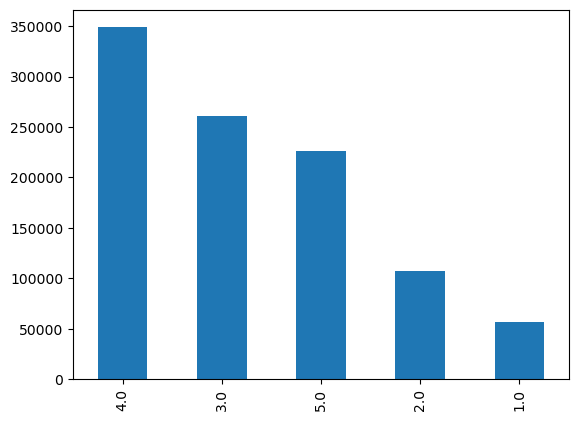

In [73]:
toystory_rating_mask = master_data['MovieID'] == 1 # creating a mask for only toystory
toystory_rating = master_data[toystory_rating_mask]['Rating'] # filtering only toystory rating results
toystory_rating_distribution = master_data[toystory_rating_mask]['Rating'].value_counts()
toystory_rating_distribution.plot.bar() # plots its user rating distribution for toystory

In [121]:
grouped = master_data.groupby("Title") # grouping DF by title 
mean_vals = grouped["Rating"].mean() # using mean to get calculate the average rating of each group
mean_df = pd.DataFrame({"mean_rating": mean_vals}) # forming a new DF to sort results
df_sorted = mean_df.sort_values("mean_rating", ascending=False) # Sorting results in decending order 
print(df_sorted.head(25)) # printing the top25 results

                                                    mean_rating
Title                                                          
Ulysses (Ulisse) (1954)                                5.000000
Lured (1947)                                           5.000000
Follow the Bitch (1998)                                5.000000
Bittersweet Motel (2000)                               5.000000
Song of Freedom (1936)                                 5.000000
One Little Indian (1973)                               5.000000
Smashing Time (1967)                                   5.000000
Schlafes Bruder (Brother of Sleep) (1995)              5.000000
Gate of Heavenly Peace, The (1995)                     5.000000
Baby, The (1973)                                       5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                    4.800000
Lamerica (1994)                                        4.750000
Apple, The (Sib) (1998)                                4.666667
Sanjuro (1962)                          

In [124]:
df_filtered = master_data.where(master_data['UserID'] == 2696 ).dropna() # Rating for all UserID  = 2696
print(df_filtered)

        MovieID                                           Title  \
95267       1.0                              Client, The (1994)   
200572      1.0                                Lone Star (1996)   
270398      1.0                           Basic Instinct (1992)   
274632      1.0               E.T. the Extra-Terrestrial (1982)   
349405      1.0                             Shining, The (1980)   
360454      1.0                       Back to the Future (1985)   
448383      1.0                                 Cop Land (1997)   
457283      1.0                        L.A. Confidential (1997)   
459925      1.0                                Game, The (1997)   
464564      1.0          I Know What You Did Last Summer (1997)   
465160      1.0                    Devil's Advocate, The (1997)   
480755      1.0  Midnight in the Garden of Good and Evil (1997)   
493339      1.0                                 Palmetto (1998)   
497035      1.0                              Wild Things (1998

In [139]:
import numpy as np

df_split = master_data["Genres"].str.split("|",expand=True)
df_flattened = df_split.values.flatten()
df_filtered = df_flattened[pd.notna(df_flattened)]
unique_genres = np.unique(df_filtered)
print(unique_genres)

['Action' 'Adventure' 'Animation' "Children's" 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


In [148]:
genres_encoded_df = master_data["Genres"].str.get_dummies(sep="|")
print(genres_encoded_df)

         Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  \
0             0          0          1           1       1      0            0   
1             0          0          1           1       1      0            0   
2             0          0          1           1       1      0            0   
3             0          0          1           1       1      0            0   
4             0          0          1           1       1      0            0   
...         ...        ...        ...         ...     ...    ...          ...   
1000381       0          0          0           0       0      0            0   
1000382       0          0          0           0       0      0            0   
1000383       0          0          0           0       0      0            0   
1000384       0          0          0           0       0      0            0   
1000385       0          0          0           0       0      0            0   

         Drama  Fantasy  Fi

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = master_data[["UserID", "MovieID"]]
y = master_data["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = np.mean((y_pred - y_test) **2)
print("Mean squared error:", mse)

r2 = model.score(X_test, y_test)
print("R-squared:",r2)

TypeError: 'method' object is not subscriptable